**OpenViSUS: read from a remote dataset**

To execute this jupyter notebook have to install: OpenViSUS, numpy, matplotlib, ipyvolume

pip3 install numpy matplotlib ipyvolume

You can do it with pip3 (which uses python3):
pip3 install OpenVisus

If the installation of OpenVisus via pip does not work you have to build it and install it yourself (see OpenViSUS README), or add your build directory to the PYTHONPATH, or in your program add it to the sys path before the import:
sys.path.append('/somepath_to_your/OpenVisus/build')


In [1]:
import sys

import gc
import sys
import math
import unittest
import string 
import unittest
import os
import matplotlib.pyplot as plt
import numpy

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import OpenVisus
from OpenVisus     import *

In [2]:
IdxModule.attach()

PythonEngine is working fine


In [4]:
tree = StringTree()
tree.loadFromXml('<access name="Multiplex" type="multiplex"> <access name="cache"  type="disk" chmod="rw" url="file:///Users/steve/visus/cache/bluemarble/visus.idx" /> <access name="source" type="network" chmod="r" compression="zip" />     </access>')

True

In [20]:
dataset=Dataset_loadDataset("http://atlantis.sci.utah.edu/mod_visus?dataset=BlueMarble")
    
box=dataset.get().getBox()
access=dataset.get().createAccess(tree)
field=dataset.get().getDefaultField()
MaxH=dataset.get().getBitmask().getMaxResolution()

In [21]:
resolution = 18

In [22]:
print(box.toString(), field.name, field.dtype.toString())

0 86400 0 43200 data uint8[3]


In [23]:
def time_query(time, resolution):
  
  slice_box=box.getZSlab(0,1);
  
  query=QueryPtr(Query(dataset.get(),ord('r')))
  query.get().position=Position(slice_box)
  query.get().end_resolutions.push_back(resolution)
  query.get().merge_mode=Query.InsertSamples
  query.get().time = time
  query.get().field = dataset.get().getDefaultField()
  dataset.get().beginQuery(query)
  #print("num samples", query.get().nsamples.innerProduct())
  if(dataset.get().executeQuery(access,query)):
    global np_data
    # convert the query result to a numpy array
    np_data = query.get().buffer.toNumPy()
    
    return True
  else:
    print("query error", query.get().getLastErrorMsg())
    return False

In [28]:
def time_query_view(time, resolution):

  if (time_query(time, resolution)):
    fig = plt.figure(figsize = (70,50))
    ax = fig.add_subplot(111)
    ax.imshow(np_data, origin='lower')
    plt.show()

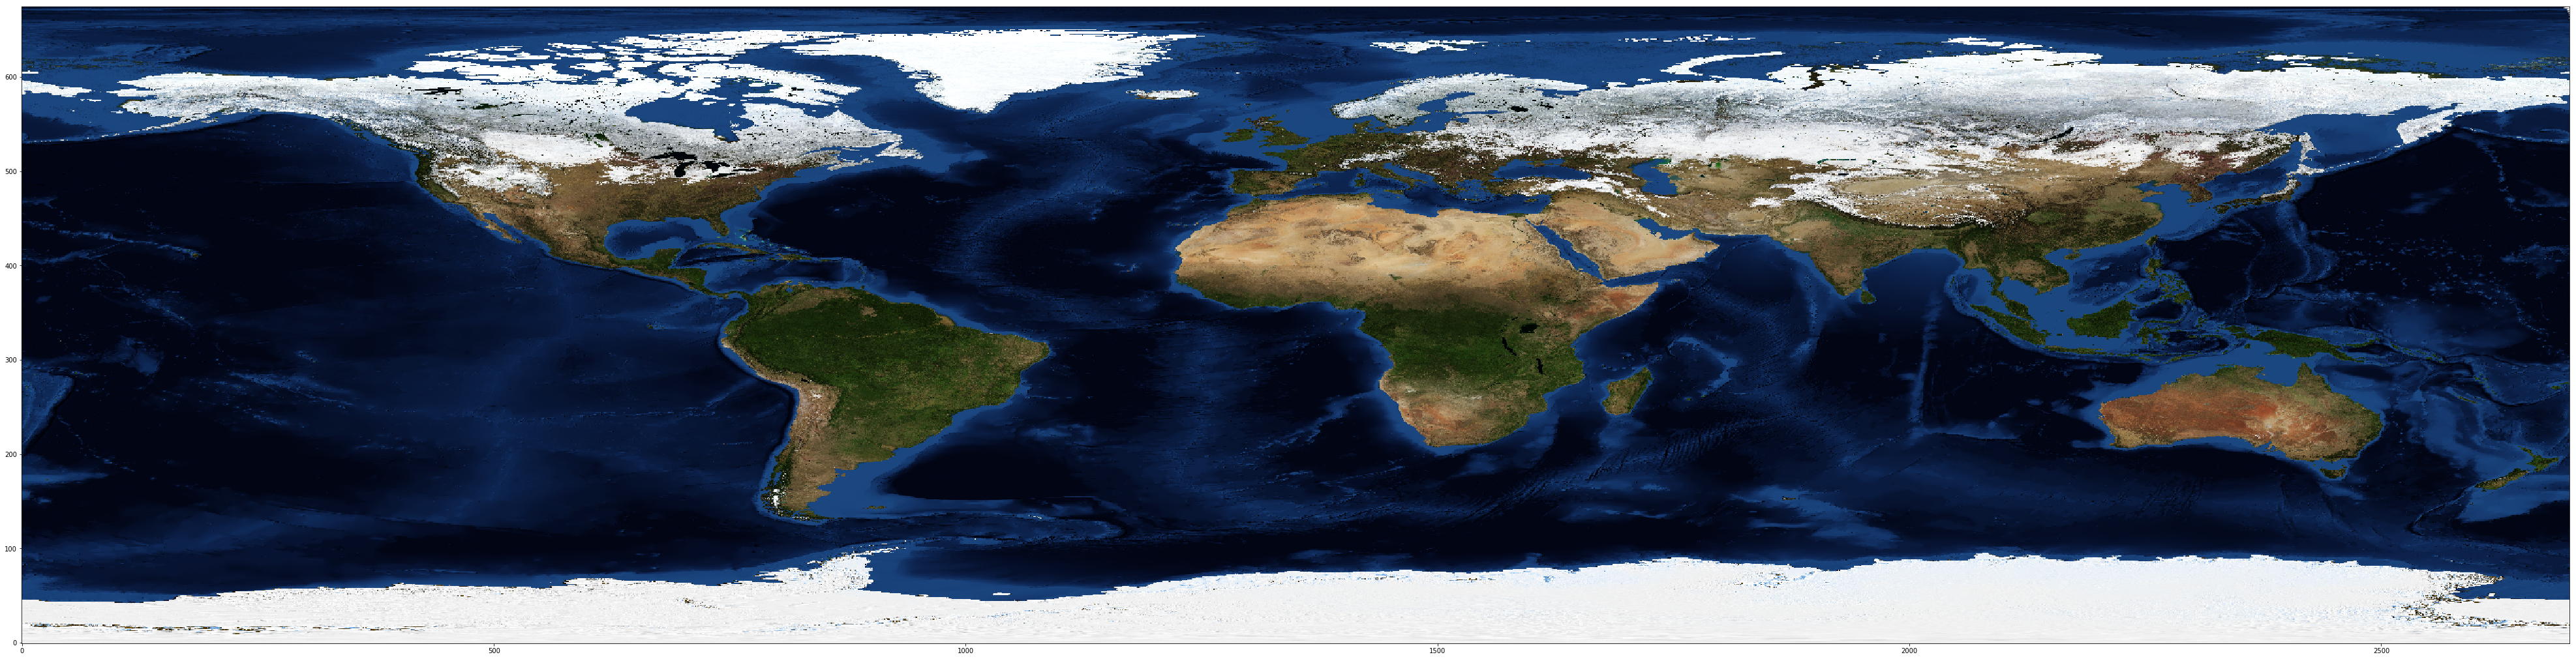

In [31]:
time_query_view(time=0, resolution=22)

In [38]:
interact(time_query_view, time=widgets.IntSlider(min=0,max=4,step=1,value=0), resolution=widgets.IntSlider(min=1,max=MaxH,step=2,value=9));

interactive(children=(IntSlider(value=0, description='time', max=4), IntSlider(value=9, description='resolutio…